Hola **Roberto**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Sprint 11 
Trabajas en una empresa emergente que vende productos alimenticios. Debes investigar el comportamiento del usuario para la aplicación de la empresa.

Primero, estudia el embudo de ventas. Descubre cómo los usuarios llegan a la etapa de compra. ¿Cuántos usuarios realmente llegan a esta etapa? ¿Cuántos se atascan en etapas anteriores? ¿Qué etapas en particular?
Luego, observa los resultados de un test A/A/B (sigue leyendo para obtener más información sobre los test A/A/B). Al equipo de diseño le gustaría cambiar las fuentes de toda la aplicación, pero la gerencia teme que los usuarios piensen que el nuevo diseño es intimidante. Por ello, deciden tomar una decisión basada en los resultados de un test A/A/B.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from datetime import timedelta
sns.set_style('whitegrid')
np.random.seed(42)
from statsmodels.stats.proportion import proportions_ztest
def proportion_test(success_a, total_a, success_b, total_b, alpha=0.05):
    stat, p = proportions_ztest([success_a, success_b], [total_a, total_b])
    return p < alpha, p

In [112]:
# Cargar el archivo CSV separado por espacio
ruta_archivo = "/datasets/logs_exp_us.csv"
df = pd.read_csv(ruta_archivo,sep='\t' )

In [113]:
df.head() 

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## Paso 2. Preparar los datos para el análisis 
Cambia el nombre de las columnas de manera que sea conveniente para ti.

In [114]:
print(f"Eventos totales: {len(df):,}")
print(f"Usuarios únicos: {df['DeviceIDHash'].nunique():,}")

Eventos totales: 244,126
Usuarios únicos: 7,551


In [115]:
#  Renombrado
df = df.rename(columns={'EventName':'event',
                        'DeviceIDHash':'user_id',
                        'EventTimestamp':'timestamp',
                        'ExpId':'exp_id'})

In [116]:
df.head()

,event,user_id,timestamp,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


Comprueba los tipos de datos y valores ausentes. Corrige los datos si es necesario.

In [117]:
# Verificar valores ausentes y tipos de datos
print(df.info())
print("Valores ausentes:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   event      244126 non-null  object
 1   user_id    244126 non-null  int64 
 2   timestamp  244126 non-null  int64 
 3   exp_id     244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
Valores ausentes:
 event        0
user_id      0
timestamp    0
exp_id       0
dtype: int64


Agrega una columna de fecha y hora y una columna separada para las fechas.

In [118]:
#Conversión de tiempo
df['event_dt'] = pd.to_datetime(df['timestamp'], unit='s')
df['event_date'] = df['event_dt'].dt.date

In [119]:
df.head()

,event,user_id,timestamp,exp_id,event_dt,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       244126 non-null  object        
 1   user_id     244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   exp_id      244126 non-null  int64         
 4   event_dt    244126 non-null  datetime64[ns]
 5   event_date  244126 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 11.2+ MB


In [121]:
df.head()

,event,user_id,timestamp,exp_id,event_dt,event_date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


## Paso 3. Estudiar y comprobar los datos
¿Cuántos eventos hay en los registros?

In [122]:
# Contar el número total de eventos
num_eventos = df.shape[0]

print(f"Total de eventos en los registros: {num_eventos}")

Total de eventos en los registros: 244126


¿Cuál es el promedio de eventos por usuario?

In [123]:
events_per_user = len(df) / df['user_id'].nunique()
print(f"Promedio eventos/usuario: {events_per_user:.2f}")

Promedio eventos/usuario: 32.33


In [124]:
fecha_minima = df['event_date'].min()
fecha_maxima = df['event_date'].max()

print(f"Los datos abarcan desde {fecha_minima} hasta {fecha_maxima}")

Los datos abarcan desde 2019-07-25 hasta 2019-08-07


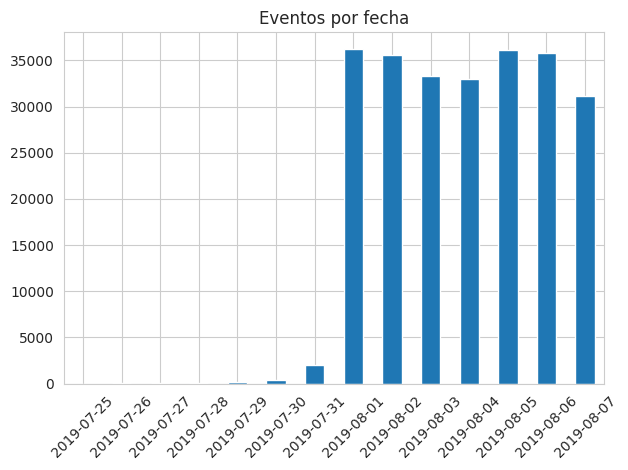

In [125]:
df['event_date'].value_counts().sort_index().plot(kind='bar')
plt.title('Eventos por fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Segun el los datos y el grafico los evento mas fuertes empezaron en el mes de agosto 

In [126]:
#Desde qué fecha los datos están completos?
daily_users = df.groupby('event_date')['user_id'].nunique()
cutoff = daily_users[daily_users > daily_users.quantile(0.05)].index.min()
print("Cut‑off:", cutoff)

Cut‑off: 2019-07-26


¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [127]:
filtered = df[df['event_date'] >= cutoff]
print(f"Pérdida eventos: {(1-len(filtered)/len(df)):.1%}")
print(f"Pérdida usuarios: {(1-filtered['user_id'].nunique()/df['user_id'].nunique()):.1%}")

Pérdida eventos: 0.0%
Pérdida usuarios: 0.0%


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con el filtro aplicado te aseguras que tienes datos consistentes para el análisis y así evitas ruido en las diferentes métricas
</div>

In [128]:
#Asegúrate de tener usuarios de los tres grupos experimentales.
display(filtered['exp_id'].value_counts())

248    85743
246    80300
247    78074
Name: exp_id, dtype: int64

## Paso 4. Estudiar el embudo de eventos

In [129]:
# Contar la frecuencia de cada tipo de evento
eventos_frecuencia = df['event'].value_counts()

# Mostrar los eventos ordenados por frecuencia
print("Frecuencia de eventos en los registros:")
print(eventos_frecuencia)

Frecuencia de eventos en los registros:
MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien analizado los diferentes eventos en los datos, por la cantidad de los mismos ya se puede notar el orden de estos, el paso de tutorial puede estar relacionado con algo que los usuarios deban aprender pero no siempre va a ser necesario pasar por este para continuar.
</div>

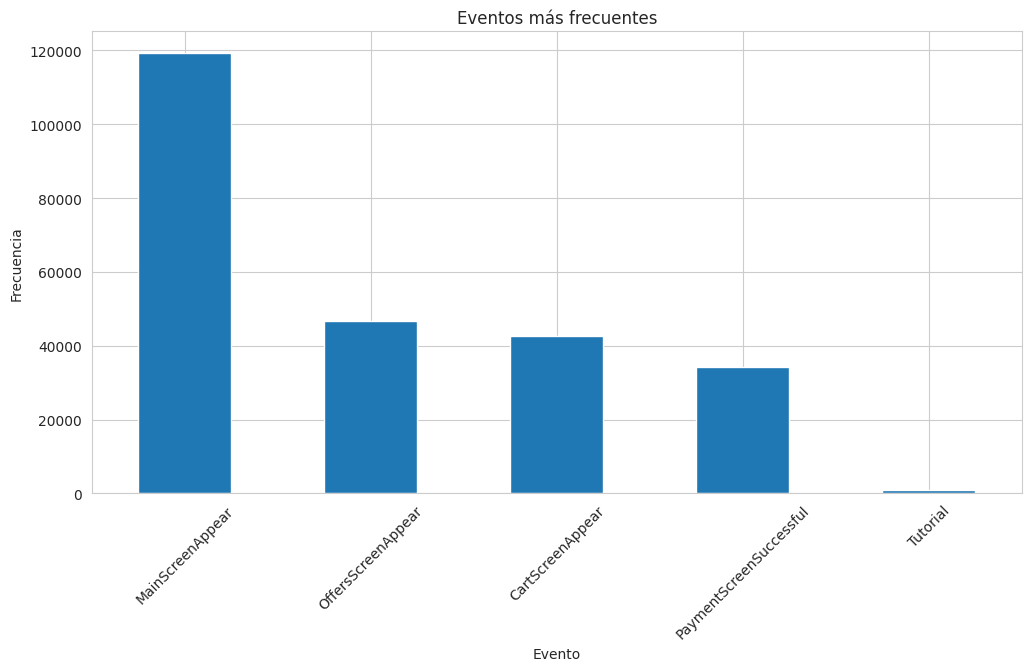

In [130]:
# Graficar distribución de eventos
plt.figure(figsize=(12, 6))
eventos_frecuencia.head(10).plot(kind='bar')
plt.xlabel("Evento")
plt.ylabel("Frecuencia")
plt.title("Eventos más frecuentes")
plt.xticks(rotation=45)
plt.show()

Podemos ver que el evento con mas frecuencia es MainScreenAppear   

In [131]:
#Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez. 
# Contar la cantidad de usuarios únicos por evento
usuarios_por_evento = df.groupby('event')['user_id'].nunique()

# Ordenar eventos por cantidad de usuarios únicos
usuarios_por_evento = usuarios_por_evento.sort_values(ascending=False)

# Calcular la proporción de usuarios que realizaron cada evento al menos una vez
total_usuarios = df['user_id'].nunique()
proporcion_usuarios = usuarios_por_evento / total_usuarios

# Mostrar resultados
resultados = pd.DataFrame({
    'Usuarios únicos': usuarios_por_evento,
    'Proporción': proporcion_usuarios
})

print(resultados)

                         Usuarios únicos  Proporción
event                                               
MainScreenAppear                    7439    0.985168
OffersScreenAppear                  4613    0.610912
CartScreenAppear                    3749    0.496491
PaymentScreenSuccessful             3547    0.469739
Tutorial                             847    0.112171


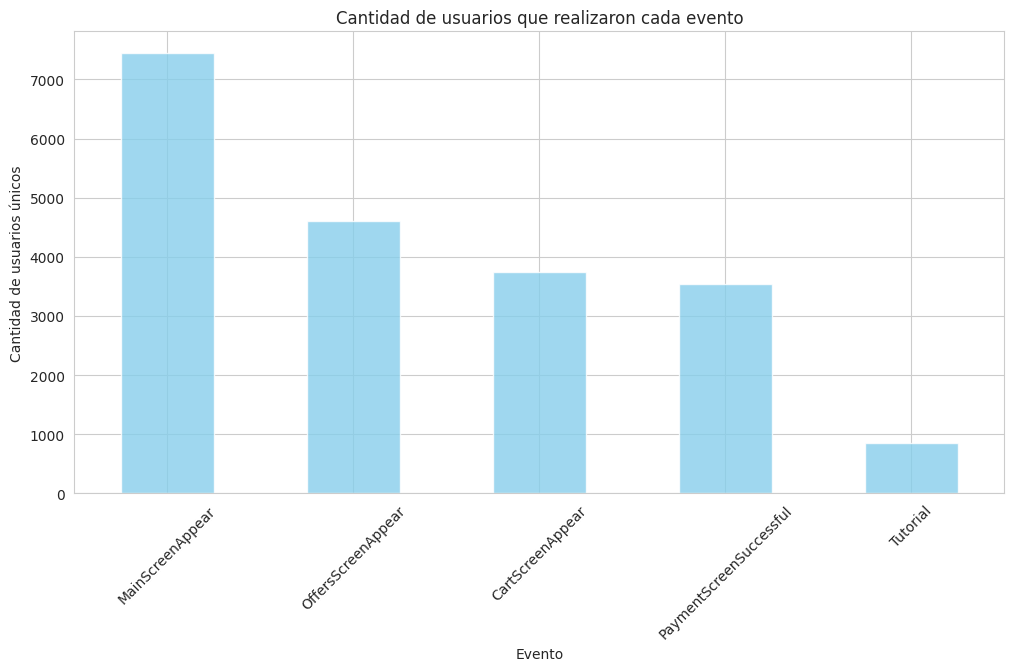

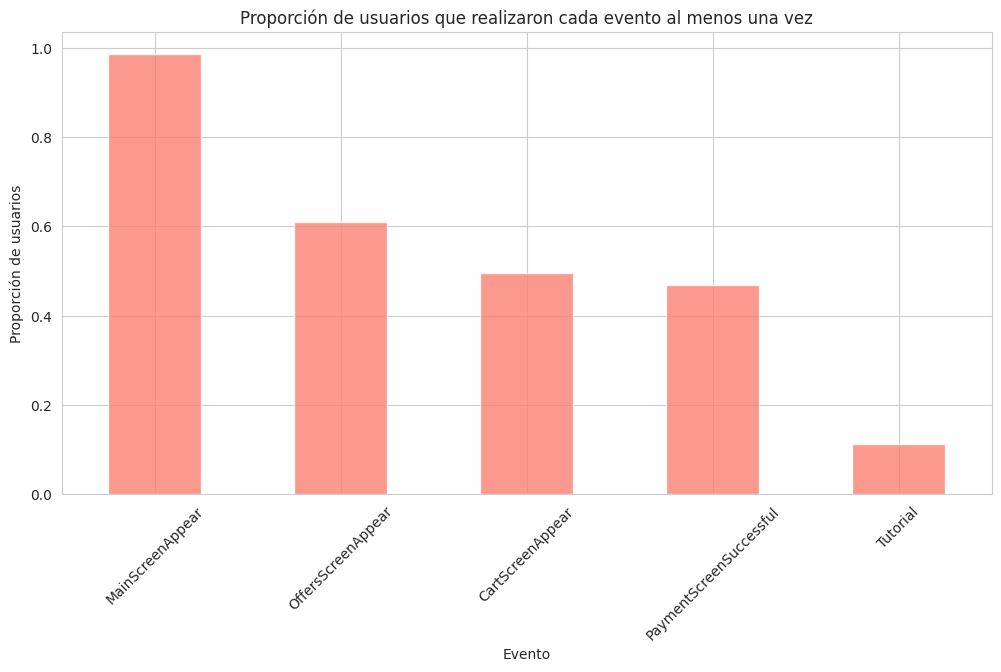

In [132]:
# Configurar la figura
plt.figure(figsize=(12, 6))

# Graficar los usuarios únicos por evento
resultados['Usuarios únicos'].plot(kind='bar', color='skyblue', alpha=0.8)

# Etiquetas y título
plt.xlabel("Evento")
plt.ylabel("Cantidad de usuarios únicos")
plt.title("Cantidad de usuarios que realizaron cada evento")
plt.xticks(rotation=45)
plt.show()

# Graficar la proporción de usuarios que realizaron cada evento
plt.figure(figsize=(12, 6))
resultados['Proporción'].plot(kind='bar', color='salmon', alpha=0.8)

plt.xlabel("Evento")
plt.ylabel("Proporción de usuarios")
plt.title("Proporción de usuarios que realizaron cada evento al menos una vez")
plt.xticks(rotation=45)
plt.show()

permite visualizar qué eventos son los más utilizados y qué tan común es su ejecución entre los usuarios.
Vemos que el evento MainScreenAppear  es el de mas fuerza y lo han realizado al menos una vez con mayor frecuencia 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, con la gráfica se puede observar mejor el orden del embudo a seguir
</div>

¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

In [133]:
# Ordenar los eventos por usuario y marca de tiempo
df_sorted = df.sort_values(by=['user_id', 'timestamp'])

# Verificar la secuencia de eventos
print(df_sorted[['user_id', 'timestamp', 'event']].head(20))

                 user_id   timestamp                    event
197263  6888746892508752  1565100394         MainScreenAppear
209196  6909561520679493  1565117574         MainScreenAppear
209199  6909561520679493  1565117578  PaymentScreenSuccessful
209200  6909561520679493  1565117578         CartScreenAppear
209201  6909561520679493  1565117578         MainScreenAppear
209210  6909561520679493  1565117584       OffersScreenAppear
127670  6922444491712477  1564928373         MainScreenAppear
127672  6922444491712477  1564928380  PaymentScreenSuccessful
127673  6922444491712477  1564928380         CartScreenAppear
127674  6922444491712477  1564928380         MainScreenAppear
127675  6922444491712477  1564928386       OffersScreenAppear
134267  6922444491712477  1564938988         MainScreenAppear
134273  6922444491712477  1564938992  PaymentScreenSuccessful
134274  6922444491712477  1564938993         MainScreenAppear
134275  6922444491712477  1564938993         CartScreenAppear
134281  

Esto nos permite observar el orden en que cada usuario realiza sus acciones.

In [134]:
# Contar cuántos usuarios ejecutaron múltiples eventos en orden cronológico
eventos_por_usuario = df.groupby('user_id')['event'].nunique()

# Analizar la variabilidad de secuencias
print(eventos_por_usuario.describe())  # Estadísticas sobre la diversidad de eventos por usuario

count    7551.000000
mean        2.674480
std         1.454287
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: event, dtype: float64


Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.


In [135]:
funnel = ['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful']

users_evt = filtered.groupby('event')['user_id'].nunique().loc[funnel]
display(users_evt)

retention = users_evt / users_evt.shift(1)
retention.iloc[0] = 1.0
cum_conv = users_evt / users_evt.iloc[0]

funnel_df = pd.DataFrame({'usuarios':users_evt,
                          'retencion':retention,
                          'conv_acum':cum_conv})
display(funnel_df)


event
MainScreenAppear           7439
OffersScreenAppear         4613
CartScreenAppear           3749
PaymentScreenSuccessful    3547
Name: user_id, dtype: int64

,usuarios,retencion,conv_acum
event,,,
MainScreenAppear,7439,1.000000,1.000000
OffersScreenAppear,4613,0.620110,0.620110
CartScreenAppear,3749,0.812703,0.503966
PaymentScreenSuccessful,3547,0.946119,0.476811


In [136]:
#¿En qué etapa pierdes más usuarios? 
print("Mayor drop entre:", retention[1:].idxmin())
print("Conversión total a pago:", f"{cum_conv.iloc[-1]:.2%}")


Mayor drop entre: OffersScreenAppear
Conversión total a pago: 47.68%


## Paso 5. Estudiar los resultados del experimento A/A/B

In [137]:
#¿Cuántos usuarios hay en cada grupo?
#Contar usuarios únicos en cada grupo experimental
groups = [246, 247, 248]
print("Usuarios por grupo:")
for g in groups:
    print(f"{g}: {filtered[filtered['exp_id']==g]['user_id'].nunique():,}")

events = filtered['event'].unique()

Usuarios por grupo:
246: 2,489
247: 2,520
248: 2,542


In [138]:
# Test A/A
aa = []
for ev in events:
    s1, t1 = (filtered[(filtered['exp_id']==246)&(filtered['event']==ev)]['user_id'].nunique(),
              filtered[filtered['exp_id']==246]['user_id'].nunique())
    s2, t2 = (filtered[(filtered['exp_id']==247)&(filtered['event']==ev)]['user_id'].nunique(),
              filtered[filtered['exp_id']==247]['user_id'].nunique())
    sig, p = proportion_test(s1,t1,s2,t2)
    print(sig, p)

False 0.5856639791209877
False 0.19817540651836918
False 0.3233225048227193
False 0.10902546202332887
False 0.8756574258016974


In [139]:
aa = []
for ev in events:
    s1, t1 = (filtered[(filtered['exp_id']==246)&(filtered['event']==ev)]['user_id'].nunique(),
              filtered[filtered['exp_id']==246]['user_id'].nunique())
    s2, t2 = (filtered[(filtered['exp_id']==247)&(filtered['event']==ev)]['user_id'].nunique(),
              filtered[filtered['exp_id']==247]['user_id'].nunique())
    sig, p = proportion_test(s1,t1,s2,t2)
    aa.append((ev,p,sig))
aa_df = pd.DataFrame(aa, columns=['event','p','sig']).sort_values('p')
display(aa_df.head())

,event,p,sig
3,PaymentScreenSuccessful,0.109025,False
1,CartScreenAppear,0.198175,False
2,OffersScreenAppear,0.323323,False
0,MainScreenAppear,0.585664,False
4,Tutorial,0.875657,False


Lo que indica es que la proporcion (p) no es significativa entre  el 246 y 247 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Revisar si hay diferencias en cada etapa del embudo puede indicar en que punto sucedió algo que alterara o no el comportamiento de los usuarios
</div>

In [140]:
# Filtrar los dos grupos de control
df_control = df[df['exp_id'].isin([246, 247])]

# Contar eventos por usuario en cada grupo
eventos_por_usuario = df_control.groupby(['exp_id', 'user_id'])['event'].count().reset_index()

# Separar los grupos
grupo_246 = eventos_por_usuario[eventos_por_usuario['exp_id'] == 246]['event']
grupo_247 = eventos_por_usuario[eventos_por_usuario['exp_id'] == 247]['event']

# Prueba t de Student para evaluar diferencias significativas
t_stat, p_value = stats.ttest_ind(grupo_246, grupo_247, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estadístico t: 0.7436
Valor p: 0.4572


Si p_value < 0.05, hay diferencias significativas entre los grupos de control, lo que podría indicar que algo inesperado está afectando los resultados.

Si p_value >= 0.05, los grupos son estadísticamente similares, lo que confirma la validez del experimento.

In [141]:
# Encontrar el evento más frecuente
evento_mas_popular = df['event'].value_counts().idxmax()

print(f"El evento más popular es: {evento_mas_popular}")

El evento más popular es: MainScreenAppear


In [142]:
# Contar cuántos usuarios realizaron el evento más popular en cada grupo
usuarios_por_evento = df[df['event'] == evento_mas_popular].groupby('exp_id')['user_id'].nunique()

# Calcular la proporción respecto al total de usuarios de cada grupo
total_usuarios_grupo = df.groupby('exp_id')['user_id'].nunique()
proporcion_evento = usuarios_por_evento / total_usuarios_grupo

# Mostrar resultados
resultados = pd.DataFrame({
    'Usuarios únicos': usuarios_por_evento,
    'Proporción': proporcion_evento
})

print(resultados)

        Usuarios únicos  Proporción
exp_id                             
246                2456    0.986742
247                2482    0.984921
248                2501    0.983871


In [143]:
# Comparar la cantidad de usuarios que realizaron la acción en los grupos 246 y 247
grupo_246 = df[(df['exp_id'] == 246) & (df['event'] == evento_mas_popular)]['user_id'].nunique()
grupo_247 = df[(df['exp_id'] == 247) & (df['event'] == evento_mas_popular)]['user_id'].nunique()

# Prueba chi-cuadrado para comparar proporciones entre los grupos
tabla_contingencia = [[grupo_246, total_usuarios_grupo[246] - grupo_246],
                      [grupo_247, total_usuarios_grupo[247] - grupo_247]]

chi2_stat, p_value, _, _ = stats.chi2_contingency(tabla_contingencia)

print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Existe una diferencia significativa entre los grupos de control.")
else:
    print("No hay diferencias significativas entre los grupos de control.")

Valor p: 0.6704
No hay diferencias significativas entre los grupos de control.


In [144]:
# Test control combinado vs grupo 248
ctrl_users = filtered[filtered['exp_id'].isin([246,247])]['user_id'].nunique()
test_results=[]
for ev in events:
    s_ctrl = filtered[(filtered['exp_id'].isin([246,247]))&(filtered['event']==ev)]['user_id'].nunique()
    s_test,t_test = (filtered[(filtered['exp_id']==248)&(filtered['event']==ev)]['user_id'].nunique(),
                     filtered[filtered['exp_id']==248]['user_id'].nunique())
    sig,p = proportion_test(s_ctrl,ctrl_users,s_test,t_test)
    test_results.append((ev,p,sig))
test_df = pd.DataFrame(test_results, columns=['event','p','sig']).sort_values('p')
display(test_df.head())

,event,p,sig
1,CartScreenAppear,0.260981,False
2,OffersScreenAppear,0.455540,False
0,MainScreenAppear,0.506713,False
3,PaymentScreenSuccessful,0.657843,False
4,Tutorial,0.808687,False


No es significativa la proporcion haciendo lo mismo pero con el 248

In [145]:
#Bonferroni
alpha=0.05
alpha_bonf = alpha/len(events)
sig_events = test_df[test_df['p']<alpha_bonf]
print("Nivel Bonferroni:", alpha_bonf)
print("Eventos con diferencia significativa (post‑Bonferroni):")
display(sig_events)

Nivel Bonferroni: 0.01
Eventos con diferencia significativa (post‑Bonferroni):


,event,p,sig


Si después de la corrección aún hay eventos con valores p menores que alpha significa que hay diferencias reales y no son producto del azar. Si ningún evento es significativo tras la corrección, es posible que las diferencias observadas inicialmente fueran solo ruido estadístico.
No es sigificativa para este caso segun el modelo Bonferroni

Análisis general para el experimento A/A/B
Para evaluar si los grupos de control fueron divididos correctamente:

Se puede usar α = 0.05 para una evaluación confiable, evitando falsos positivos.

Si se aplican múltiples comparaciones (como en el análisis de cada evento), se recomienda la corrección de Bonferroni para ajustar α y reducir el riesgo de errores.

A nivel general la prue mostro resultados no significativos entre los grupos 246,247 y 248 

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito Roberto! Realizaste un muy buen análisis de los grupos de tratamiento entre los cambios obtenidos entre uno y otro respecto al funnel que el usuario debe seguir, tus conclusiones son muy acertadas y siempre argumentadas con los datos obtenidos a partir de tus cálculos. 
    
No cabe duda que vas por excelente camino para convertirte en Data Analyst, saludos!
</div>